# Modelando o CSV
Modificações iniciais no dataset para adequá-lo mais ao modelo.



**Importação de bibliotecas do Python:**

* Drive: Para acessar o Google Drive onde o CSV está localizado
* Pandas: Para a manipulação e análise dos dados
* Matplotlib: Para a criação de gráficos
* Numpy: Para a manipulação de arrays




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* **Leitura do csv**

In [ ]:
df_teste = pd.read_csv('drive/MyDrive/Colab Notebooks/df_dados_cliente_totais_novos.csv')
del df_teste['Unnamed: 0']

* **Junção da coluna hora com a de minuto em formato decimal**



In [ ]:
df_teste["Hora e Minuto"] = df_teste['Hora'] + + df_teste["Minuto"]/60

* **Remoção das colunas 'Programa', 'Gênero' e 'Minuto' e criação da coluna 'Jornalismo'**

In [ ]:
df_teste.drop(['Programa'], axis=1, inplace=True)
df_teste.drop(['Gênero'], axis=1, inplace=True)
df_teste.drop(['Minuto'], axis=1, inplace=True)

* **Transformação das colunas 'Ano', 'Mês', 'Dia' e 'Hora' para formato numérico**

In [ ]:
df_teste['Ano'] = pd.to_numeric(df_teste['Ano'], errors='coerce')
df_teste['Mês'] = pd.to_numeric(df_teste['Mês'], errors='coerce')
df_teste['Dia'] = pd.to_numeric(df_teste['Dia'], errors='coerce')
df_teste['Hora'] = pd.to_numeric(df_teste['Hora'], errors='coerce')
df_teste['Total de Indivíduos'] = pd.to_numeric(df_teste['Total de Indivíduos'], errors='coerce')

* **Aplicação de Label encoding na coluna 'Dia da Semana'**

In [ ]:
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Domingo', 1, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Segunda', 2, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Terça', 3, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Quarta', 4, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Quinta', 5, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Sexta', 6, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Sábado', 7, inplace=True)
df_teste['Dia da Semana'] = pd.to_numeric(df_teste['Dia da Semana'], errors='coerce')

# Random Forest

**Criação de datasets para o modelo** 

In [ ]:
df_both = df_teste
#y = df_both[['Total de Domicílios','Masculino','Feminino','AB','C1','C2','DE','4-11 anos','12-17 anos','18-24 anos','25-34 anos','35-49 anos','50-59 anos','60+ anos','Total de Indivíduos','Masculino FID','Feminino FID','AB FID','C1 FID','C2 FID','DE FID','4-11 anos FID','12-17 anos FID','18-24 anos FID','25-34 anos FID','35-49 anos FID','50-59 anos FID','60+ anos FID','Total de Domicílios SHR','Masculino SHR','Feminino SHR','AB SHR','C1 SHR','C2 SHR','DE SHR','4-11 anos SHR','12-17 anos SHR','18-24 anos SHR','25-34 anos SHR','35-49 anos SHR','50-59 anos SHR','60+ anos SHR']]
#y = df_both[['Total de Domicílios', 'Total de Domicílios SHR', 'Total de Indivíduos']]
#y = df_both[['Total de Domicílios','Masculino','Feminino','AB','C1','C2','DE','4-11 anos','12-17 anos','18-24 anos','25-34 anos','35-49 anos','50-59 anos','60+ anos']]
y = df_both['Total de Domicílios']

**Remoção do output desejado**

In [ ]:

df_both.drop(['Total de Domicílios'], axis=1, inplace=True)
df_both.drop(['Masculino'], axis=1, inplace=True)
df_both.drop(['Feminino'], axis=1, inplace=True)
df_both.drop(['AB'], axis=1, inplace=True)
df_both.drop(['C1'], axis=1, inplace=True)
df_both.drop(['C2'], axis=1, inplace=True)
df_both.drop(['DE'], axis=1, inplace=True)
df_both.drop(['4-11 anos'], axis=1, inplace=True)
df_both.drop(['12-17 anos'], axis=1, inplace=True)
df_both.drop(['18-24 anos'], axis=1, inplace=True)
df_both.drop(['25-34 anos'], axis=1, inplace=True)
df_both.drop(['35-49 anos'], axis=1, inplace=True)
df_both.drop(['50-59 anos'], axis=1, inplace=True)
df_both.drop(['60+ anos'], axis=1, inplace=True)
df_both.drop(['Total de Indivíduos'], axis=1, inplace=True)
df_both.drop(['Masculino FID'], axis=1, inplace=True)
df_both.drop(['Feminino FID'], axis=1, inplace=True)
df_both.drop(['AB FID'], axis=1, inplace=True)
df_both.drop(['C1 FID'], axis=1, inplace=True)
df_both.drop(['C2 FID'], axis=1, inplace=True)
df_both.drop(['DE FID'], axis=1, inplace=True)
df_both.drop(['4-11 anos FID'], axis=1, inplace=True)
df_both.drop(['12-17 anos FID'], axis=1, inplace=True)
df_both.drop(['18-24 anos FID'], axis=1, inplace=True)
df_both.drop(['25-34 anos FID'], axis=1, inplace=True)
df_both.drop(['35-49 anos FID'], axis=1, inplace=True)
df_both.drop(['50-59 anos FID'], axis=1, inplace=True)
df_both.drop(['60+ anos FID'], axis=1, inplace=True)
df_both.drop(['Total de Domicílios SHR'], axis=1, inplace=True)
df_both.drop(['Masculino SHR'], axis=1, inplace=True)
df_both.drop(['Feminino SHR'], axis=1, inplace=True)
df_both.drop(['AB SHR'], axis=1, inplace=True)
df_both.drop(['C1 SHR'], axis=1, inplace=True)
df_both.drop(['C2 SHR'], axis=1, inplace=True)
df_both.drop(['DE SHR'], axis=1, inplace=True)
df_both.drop(['4-11 anos SHR'], axis=1, inplace=True)
df_both.drop(['12-17 anos SHR'], axis=1, inplace=True)
df_both.drop(['18-24 anos SHR'], axis=1, inplace=True)
df_both.drop(['25-34 anos SHR'], axis=1, inplace=True)
df_both.drop(['35-49 anos SHR'], axis=1, inplace=True)
df_both.drop(['50-59 anos SHR'], axis=1, inplace=True)
df_both.drop(['60+ anos SHR'], axis=1, inplace=True)

**Divisão entre dados de treinamento e teste**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_both, y, test_size=0.15, shuffle=True)

**Criação e treinamento do modelo**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=100, max_depth=64, max_features='auto')
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=64)

**Predição do dataset separado para teste com o modelo treinado**

In [ ]:
test_pred = forest_model.predict(X_test)

* Métricas do teste

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(r2_score(y_test, test_pred)) #R quadrado
print(mean_absolute_error(y_test, test_pred)) #erro médio absoluto
print(mean_squared_error(y_test, test_pred)) #erro médio quadrático

0.9828727675067797
0.6702768848116003
1.091137867576678


**Predição do dataset separado para treino com o modelo treinado**

In [ ]:
train_pred = forest_model.predict(X_train)

* Métricas do treinamento

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(r2_score(y_train, train_pred)) #R quadrado
print(mean_absolute_error(y_train, train_pred)) #erro médio absoluto
print(mean_squared_error(y_train, train_pred)) #erro médio quadrático

0.9976016738133701
0.24961943212759533
0.15159037419289478


# Gráficos e comparações

**Gráfico de comparação valor real X valor predito**

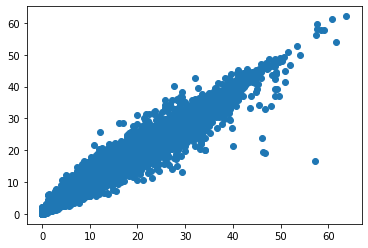

In [ ]:
plt.scatter(y_test,test_pred)

**Dataframe de comparação valor real X valor predito**

In [ ]:
results = {'Valor real': y_test, 'Predição': test_pred}
df_results = pd.DataFrame(data=results)
df_results

,Valor real,Predição
424245,10.83,10.1162
708658,11.82,11.6967
334322,6.93,7.1205
144430,12.77,11.0971
229344,7.45,8.0548
...,...,...
451580,3.40,4.1921
496176,5.02,4.5424
534155,16.92,16.6906
736495,8.49,8.5624


**Função de criação de gráficos de comparação**

In [ ]:
def grafico_metricas(valores_x, valores_y, tipo_dado, nome_modelo):

    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.stats import linregress

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

    ax1.set_title("Relação linear entre as séries de dados reais e preditos \n para o conjunto de " + tipo_dado + \
                  " do modelo " + nome_modelo, fontsize=20, weight='bold')
    ax1.set_xlabel("Série de audiências reais para " + tipo_dado, fontsize=20)
    ax1.set_ylabel("Série de audiências preditas para" + tipo_dado, fontsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)

    slope, intercept, r_value, p_value, std_err = linregress(valores_x, valores_y)
    xaxis_regression = np.linspace(min(valores_x), max(valores_x), num=100)

    equation = ("y = " + "{:.5f}".format(slope) + "x" + " + (" + "{:.5f}".format(intercept) + ")")

    ax1.scatter(valores_x, valores_y, lw=3, color = "#2D243F", label = "timestamps")
    ax1.plot(xaxis_regression, intercept + slope * xaxis_regression, ls = "--", color="#E44B4A", lw=4, label = equation)

    ax1.annotate("r²=" + "{:.2f}".format(r_value**2), xy=(0.1, 0.79), xycoords='axes fraction', fontsize=20)
    ax1.annotate("ρ=" + "{:.2f}".format(p_value), xy=(0.1, 0.84), xycoords='axes fraction', fontsize=20)
    ax1.grid()
    ax1.legend(prop={"size": 15})

    difference_results = valores_x - valores_y
    
    ax2.set_title("Distribuição das diferenças entre séries reais e preditas \n para o conjunto de " + tipo_dado + \
              " do modelo " + nome_modelo, fontsize=20, weight='bold')
    
    ax2.set_xlabel("Diferença entre audiências reais e preditas (" + tipo_dado + ") ", fontsize=20)
    ax2.set_ylabel("Distribuição das diferenças", fontsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)

    difference_results_std = difference_results.std()
    difference_results_stde_mean = difference_results.sem()
    difference_results_var = difference_results.var()

    box_differences = ax2.boxplot(difference_results, medianprops=dict(color="#2D243F", linewidth=5), patch_artist = True)
    box_differences["boxes"][0].set_facecolor("#E44B4A")
    ax2.annotate("std σ=" + "{:.2f}".format(difference_results_std), xy=(0.7, 0.8), xycoords='axes fraction', fontsize=20)
    ax2.annotate("SE=" + "{:.2f}".format(difference_results_stde_mean), xy=(0.7, 0.75), xycoords='axes fraction', fontsize=20)
    ax2.annotate("var σ²=" + "{:.2f}".format(difference_results_var), xy=(0.7, 0.70), xycoords='axes fraction', fontsize=20)
    ax2.grid()

    plt.show()

    return "{:.2f}".format(r_value**2), p_value, difference_results_std, difference_results_stde_mean, difference_results_var

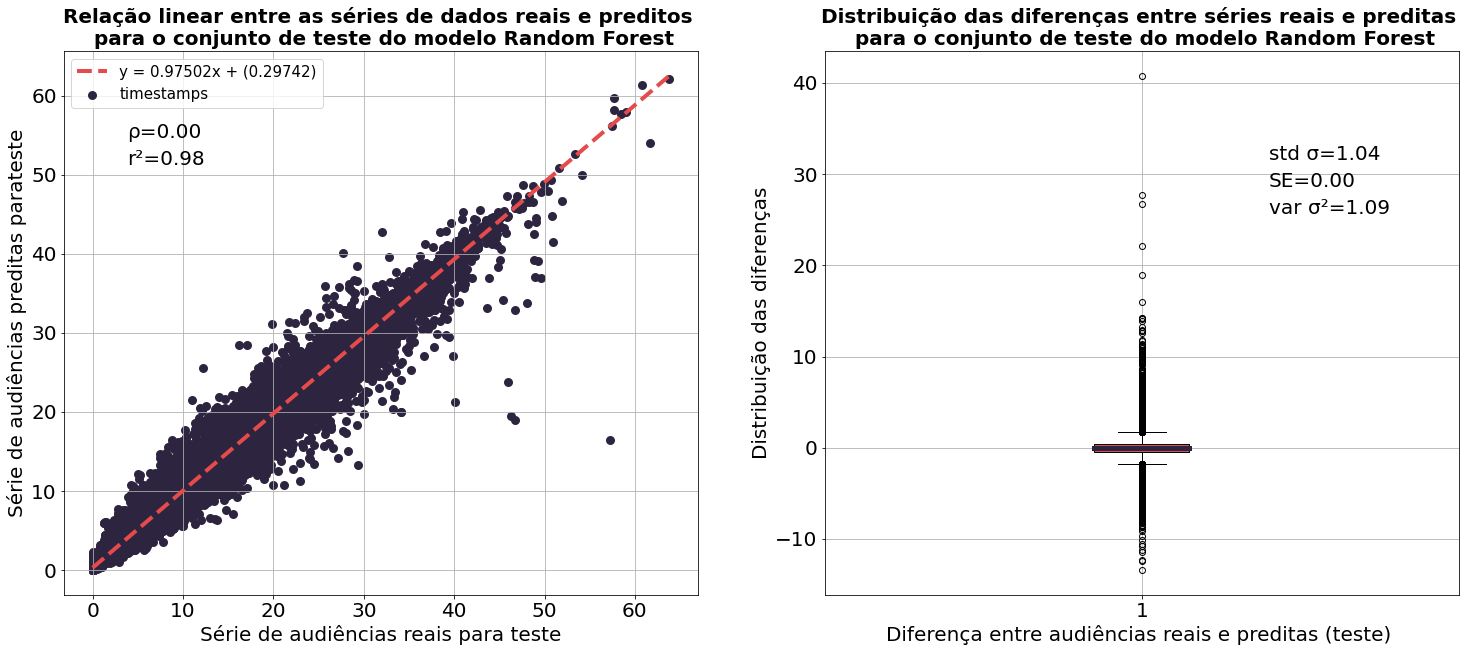

In [ ]:
a, b, c, d, e = grafico_metricas(y_test, test_pred, "teste", "Random Forest")

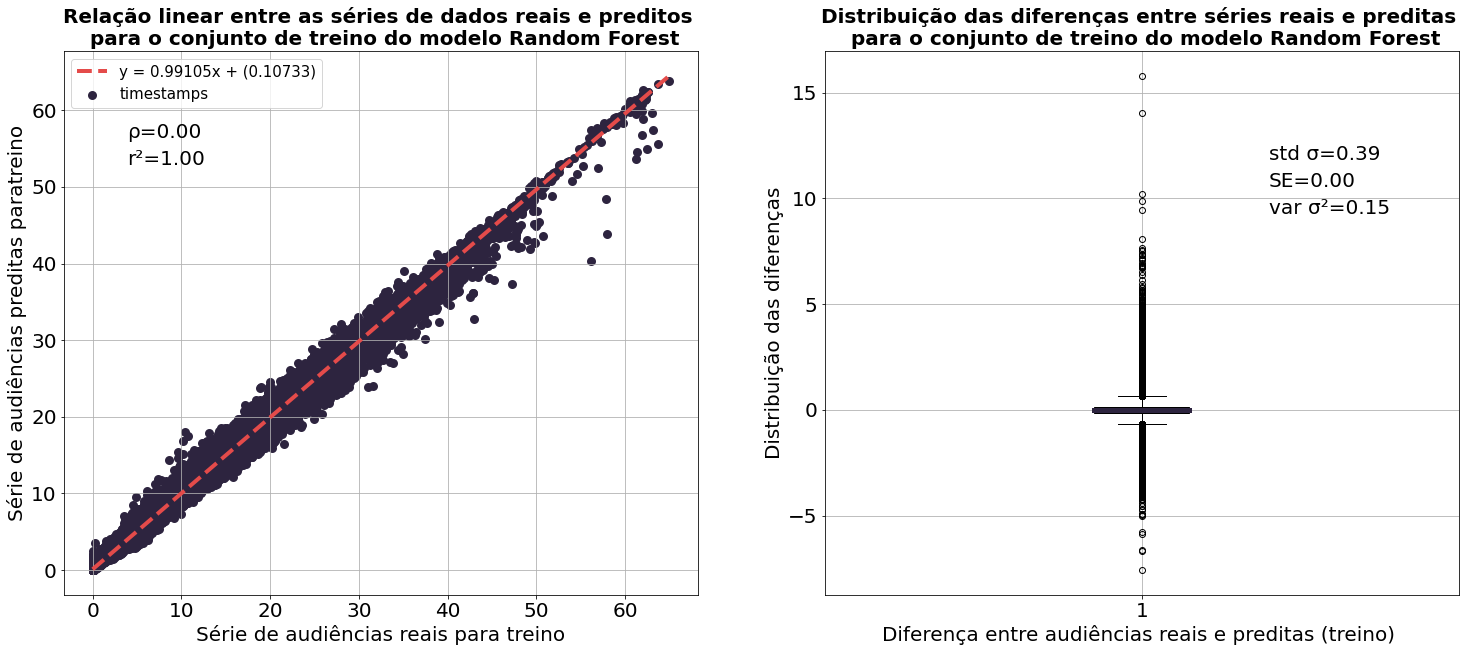

In [ ]:
f, g, h, i, j = grafico_metricas(y_train, train_pred, "treino", "Random Forest")

**Criação de dataframe com as informações de métricas do modelo no teste e no treino**

In [ ]:
dic_results_teste = {'Modelo': 'Random Forest', 'Tipo_de_dado':['Teste','Treino'], 'r²':[a,f], 'ρ':[b,g] ,'std σ':[c,h],'SE':[d,i], 'var':[e,j]}
results_teste_df = pd.DataFrame(data=dic_results_teste)
results_teste_df

,Modelo,Tipo_de_dado,r²,ρ,std σ,SE,var
0,Random Forest,Teste,0.98,0.0,1.044566,0.003037,1.091118
1,Random Forest,Treino,1.00,0.0,0.389332,0.000476,0.151580


# Hiperparametrização

**Criação do Grid Seach e inserção dos parâmetros**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth' : [8,16,32,64]
}

regr = RandomForestRegressor(random_state=0)

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(regr, parameters)

**Inserção dos dados para treino**

In [ ]:
clf.fit(X_train, y_train)

**Predição com os melhores valores de parâmetros**

In [ ]:
clf_pred = clf.predict(X_test)

**Print dos melhores valores e do melhor resultado**

In [ ]:
print(clf.best_score_)
print(clf.best_params_)

**Métricas da predição do Grid Search**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(r2_score(y_test, clf_pred)) #R quadrado
print(mean_absolute_error(y_test, clf_pred)) #erro médio absoluto
print(mean_squared_error(y_test, clf_pred)) #erro médio quadrático